###PHÂN TÍCH KỸ THUẬT


In [4]:
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy

In [6]:
# Đọc dữ liệu đầu vào
original_df = pd.read_csv('/content/ree.csv')
# Đổi tên các columns
original_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
original_df.head()


,Date,Open,High,Low,Close,Volume
0,2000-07-28,16.0,16.0,16.0,1.41,1000
1,2000-07-31,16.3,16.3,16.3,1.44,300
2,2000-08-02,16.6,16.6,16.6,1.47,100
3,2000-08-04,16.9,16.9,16.9,1.49,200
4,2000-08-07,17.2,17.2,17.2,1.52,2800


# **TA strategy**

In [7]:
#Tính toán đường Moving Average (MA)
def calculate_ma(data, window):
    return data.rolling(window=window).mean()

ta_df = original_df.copy()
ma_20 = calculate_ma(ta_df['Close'], 20)  # MA20
ma_50 = calculate_ma(ta_df['Close'], 50)  # MA50
ta_df['MA20'] = ma_20
ta_df['MA50'] = ma_50
ta_df


,Date,Open,High,Low,Close,Volume,MA20,MA50
0,2000-07-28,16.00,16.0,16.00,1.41,1000,NaN,NaN
1,2000-07-31,16.30,16.3,16.30,1.44,300,NaN,NaN
2,2000-08-02,16.60,16.6,16.60,1.47,100,NaN,NaN
3,2000-08-04,16.90,16.9,16.90,1.49,200,NaN,NaN
4,2000-08-07,17.20,17.2,17.20,1.52,2800,NaN,NaN
...,...,...,...,...,...,...,...,...
4732,2020-03-12,28.60,29.0,27.85,28.00,1147630,32.1670,33.1530
4733,2020-03-13,26.25,28.7,26.25,28.20,1340020,31.9020,33.0402
4734,2020-03-16,27.70,28.5,27.70,28.05,892480,31.6365,32.9168
4735,2020-03-17,27.70,30.0,27.70,29.90,1234080,31.4590,32.8162


In [8]:
# Tạo lệnh mua hoặc bán
positions = []  # Danh sách các vị trí trong lệnh (mua hoặc bán)

for i in range(len(ta_df)):
    if ma_20[i] > ma_50[i] and ma_20[i - 1] <= ma_50[i - 1]:
        # Khi đường MA20 cắt lên trên đường MA50
        # Mở lệnh mua
        positions.append('buy')

    elif ma_20[i] < ma_50[i] and ma_20[i - 1] >= ma_50[i - 1]:
        # Khi đường MA20 cắt xuống đường MA50
        # Đóng lệnh mua (bán)
        positions.append('sell')
    else:
        positions.append('None')
# gán list chứa lệnh mua hoặc bán vào dataframe tổng
ta_df['position'] = positions
ta_df['Date'] = pd.to_datetime(ta_df['Date'])
ta_df = ta_df.set_index('Date')
ta_df

,Open,High,Low,Close,Volume,MA20,MA50,position
Date,,,,,,,,
2000-07-28,16.00,16.0,16.00,1.41,1000,NaN,NaN,None
2000-07-31,16.30,16.3,16.30,1.44,300,NaN,NaN,None
2000-08-02,16.60,16.6,16.60,1.47,100,NaN,NaN,None
2000-08-04,16.90,16.9,16.90,1.49,200,NaN,NaN,None
2000-08-07,17.20,17.2,17.20,1.52,2800,NaN,NaN,None
...,...,...,...,...,...,...,...,...
2020-03-12,28.60,29.0,27.85,28.00,1147630,32.1670,33.1530,None
2020-03-13,26.25,28.7,26.25,28.20,1340020,31.9020,33.0402,None
2020-03-16,27.70,28.5,27.70,28.05,892480,31.6365,32.9168,None


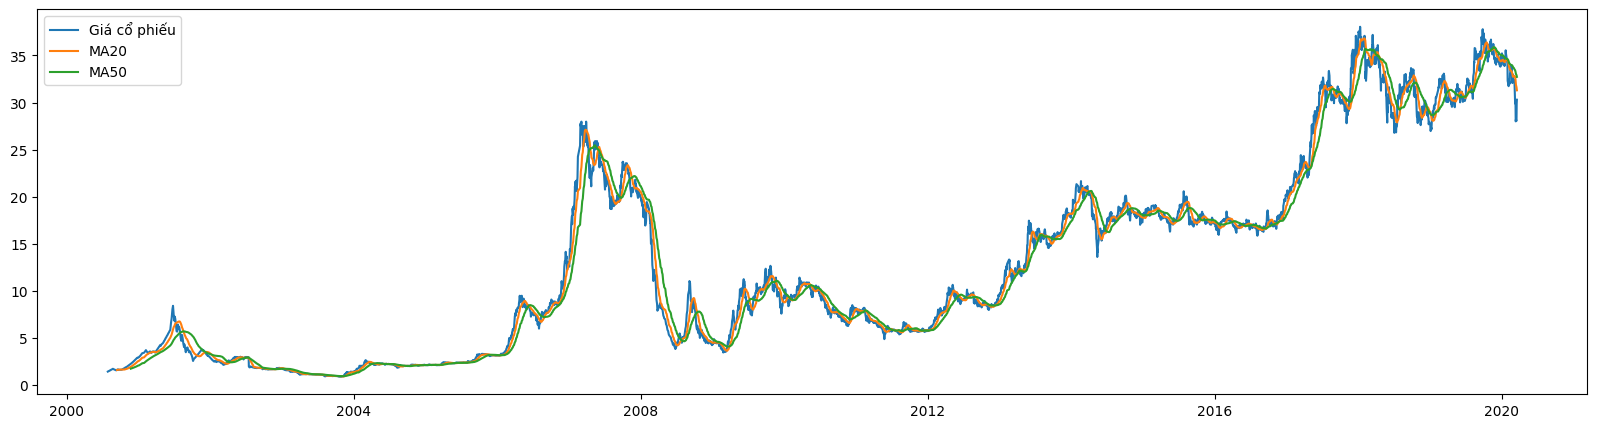

In [9]:
# Vẽ biểu đồ giá cổ phiếu và MA
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(ta_df['Close'], label='Giá cổ phiếu')
plt.plot(ta_df['MA20'], label='MA20')
plt.plot(ta_df['MA50'], label='MA50')
plt.legend()
plt.show()


In [10]:
# Chạy Backtest
# Định nghĩa class chiến lược mua hoặc bán
class GeneralStrategy(Strategy):
    def init(self):
        pass

    # Override next() method in Strategy bass class
    # Define our stratergy
    def next(self):
        if self.data.position == 'buy':
            self.buy(size = 5000)          # Số lượng mua là 5000
        elif self.data.position == 'sell':
            #self.position.close()
            self.sell(size = 5000)         # Số lượng bán là 5000


In [11]:
# Backtest for MA
MA_bt = Backtest(ta_df, GeneralStrategy, cash=100000, commission=0.002, trade_on_close=True, exclusive_orders=True)
stats_MA = MA_bt.run()
stats_MA.to_frame()

,0
Start,2000-07-28 00:00:00
End,2020-03-18 00:00:00
Duration,7173 days 00:00:00
Exposure Time [%],96.601224
Equity Final [$],419727.6
Equity Peak [$],462256.6
Return [%],319.7276
Buy & Hold Return [%],2048.93617
Return (Ann.) [%],7.92965
Volatility (Ann.) [%],8.917983


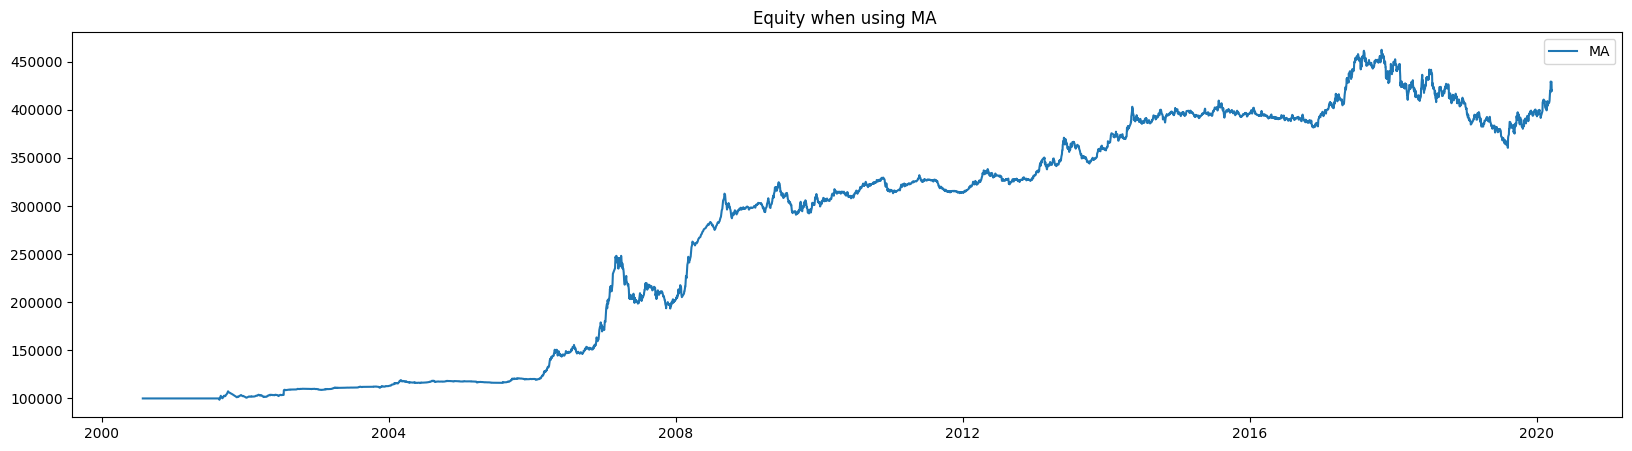

In [12]:
# Plot to compare Equity
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(stats_MA._values[-2]['Equity'], label = 'MA')
plt.title("Equity when using MA ")
plt.legend()
plt.show()

# FA stratergy

In [13]:
# Đọc dữ liệu đầu vào
ree_fun_df = pd.read_csv('/content/ree_fundamentals.csv')

In [14]:
# Tiền xử lý dữ liệu
fa_df = ree_fun_df.copy()
# Tính dữ liệu theo quý
fa_df = fa_df[['year','quarter','owners_equity','net_revenue']]

# loại bỏ hàng chứa thông tin thống kê theo năm
fa_df = fa_df[fa_df['quarter'] != -1]

# Sắp xếp các thông tin theo năm và quý tăng dần
fa_df.sort_values(by=['year','quarter'],inplace = True)

# Tính toán chỉ số RoE
fa_df['RoE'] = fa_df['net_revenue']/fa_df['owners_equity']*100
fa_df


,year,quarter,owners_equity,net_revenue,RoE
70,2004,3,NaN,1.556749e+09,NaN
68,2005,1,3.163631e+11,8.735132e+10,27.611100
67,2005,2,3.383212e+11,1.350101e+11,39.905898
66,2005,3,3.366943e+11,1.021454e+11,30.337736
65,2005,4,5.051831e+11,1.258328e+11,24.908359
63,2006,1,5.682300e+11,1.764834e+11,31.058443
62,2006,2,5.658958e+11,2.645850e+11,46.755063
61,2006,3,5.942578e+11,2.080137e+11,35.003955
60,2006,4,1.041387e+12,3.859928e+11,37.065250
58,2007,1,2.031037e+12,1.846689e+11,9.092345


In [15]:
# Thiết lập logic mua và bán
# Nếu chỉ số RoE lớn hơn ngưỡng mua -> thực hiện lệnh mua vào đầu quý sau
# Nếu chỉ số RoE bé hơn ngưỡng bé -> thực hiện lệnh bán vào đầu quý sau
nguong_mua = 15
nguong_ban = 10
# Decision making
fa_df.loc[fa_df['RoE'] > nguong_mua, 'position'] = 'buy'
fa_df.loc[fa_df['RoE'] < nguong_ban, 'position'] =  'sell'

fa_df.head(15)

,year,quarter,owners_equity,net_revenue,RoE,position
70,2004,3,NaN,1.556749e+09,NaN,NaN
68,2005,1,3.163631e+11,8.735132e+10,27.611100,buy
67,2005,2,3.383212e+11,1.350101e+11,39.905898,buy
66,2005,3,3.366943e+11,1.021454e+11,30.337736,buy
65,2005,4,5.051831e+11,1.258328e+11,24.908359,buy
63,2006,1,5.682300e+11,1.764834e+11,31.058443,buy
62,2006,2,5.658958e+11,2.645850e+11,46.755063,buy
61,2006,3,5.942578e+11,2.080137e+11,35.003955,buy
60,2006,4,1.041387e+12,3.859928e+11,37.065250,buy
58,2007,1,2.031037e+12,1.846689e+11,9.092345,sell


In [16]:
# Xác định ngày mua và bán cụ thể
def get_order_date(current_row):
    next_quarter = 0
    next_year = 0
    # Thời gian order sẽ là quý tiếp theo hoặc năm tiếp theo nếu là quý 4
    if current_row['quarter'] != 4:
        next_quarter = current_row['quarter'] +1
        next_year = current_row['year']
    else:
        next_quarter = 1
        next_year = current_row['year'] + 1
    # Return
    if current_row['position'] == 'buy' or current_row['position'] == 'sell' :
        return  next_year, next_quarter
    else:
        return   current_row['year'], current_row['quarter']

fa_df[['year','quarter']] = fa_df.apply(lambda x:  get_order_date(x), axis = 1, result_type='expand')
# bỏ đi các cột khác không quan trọng
fa_df = fa_df[['year','quarter','RoE','position']]
# Loại bỏ các hàng chứa NaN
fa_df.dropna(axis = 0,  inplace=True)
fa_df.head()

<ipython-input-16-1a3841e8550d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_df.dropna(axis = 0,  inplace=True)


,year,quarter,RoE,position
68,2005,2,27.611100,buy
67,2005,3,39.905898,buy
66,2005,4,30.337736,buy
65,2006,1,24.908359,buy
63,2006,2,31.058443,buy


In [17]:
# Đấu nối dữ liệu chứa lệnh mua và bán với dữ liệu ban đầu (dạng open/high/low/close price)
fa_price_data = original_df.copy()
fa_price_data['Date'] = pd.to_datetime(fa_price_data['Date'])
# Thời gian thành năm - quý
fa_price_data['year'] = fa_price_data['Date'].dt.year
fa_price_data['quarter'] = fa_price_data['Date'].dt.quarter

# Hiển thị dữ liệu
fa_price_data

,Date,Open,High,Low,Close,Volume,year,quarter
0,2000-07-28,16.00,16.0,16.00,1.41,1000,2000,3
1,2000-07-31,16.30,16.3,16.30,1.44,300,2000,3
2,2000-08-02,16.60,16.6,16.60,1.47,100,2000,3
3,2000-08-04,16.90,16.9,16.90,1.49,200,2000,3
4,2000-08-07,17.20,17.2,17.20,1.52,2800,2000,3
...,...,...,...,...,...,...,...,...
4732,2020-03-12,28.60,29.0,27.85,28.00,1147630,2020,1
4733,2020-03-13,26.25,28.7,26.25,28.20,1340020,2020,1
4734,2020-03-16,27.70,28.5,27.70,28.05,892480,2020,1
4735,2020-03-17,27.70,30.0,27.70,29.90,1234080,2020,1


In [18]:
# Hiển thị các ngày thực hiện các lệnh
for year_, quarter_ , roe_ ,order_ in fa_df.copy().to_numpy():
    print("Lệnh "+ order_+" được thực hiện vào tất cả các ngày trong quý: ", quarter_, ", năm: ",year_)

Lệnh buy được thực hiện vào tất cả các ngày trong quý:  2 , năm:  2005
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  3 , năm:  2005
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  4 , năm:  2005
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  1 , năm:  2006
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  2 , năm:  2006
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  3 , năm:  2006
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  4 , năm:  2006
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  1 , năm:  2007
Lệnh sell được thực hiện vào tất cả các ngày trong quý:  2 , năm:  2007
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  1 , năm:  2008
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  3 , năm:  2008
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  1 , năm:  2009
Lệnh sell được thực hiện vào tất cả các ngày trong quý:  2 , năm:  2009
Lệnh buy được thực hiện vào tất cả các ngày trong quý:  1 , năm:  2010
Lệnh

In [19]:
# bảng dữ liệu time series chứa giá đóng cửa và lệnh tương ứng

# Ghép dữ liệu action (mua/bán) vào dữ liệu giá ban đầu
final_fa_data = fa_price_data.merge(fa_df, how = 'left')
final_fa_data['Date'] = pd.to_datetime(final_fa_data['Date'])
# Chuyển đổi Datetime thành index trước khi cho vào backtest
final_fa_data = final_fa_data.set_index('Date')
final_fa_data

,Open,High,Low,Close,Volume,year,quarter,RoE,position
Date,,,,,,,,,
2000-07-28,16.00,16.0,16.00,1.41,1000,2000,3,NaN,NaN
2000-07-31,16.30,16.3,16.30,1.44,300,2000,3,NaN,NaN
2000-08-02,16.60,16.6,16.60,1.47,100,2000,3,NaN,NaN
2000-08-04,16.90,16.9,16.90,1.49,200,2000,3,NaN,NaN
2000-08-07,17.20,17.2,17.20,1.52,2800,2000,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-03-12,28.60,29.0,27.85,28.00,1147630,2020,1,NaN,NaN
2020-03-13,26.25,28.7,26.25,28.20,1340020,2020,1,NaN,NaN
2020-03-16,27.70,28.5,27.70,28.05,892480,2020,1,NaN,NaN


In [20]:
# Backtest for FA
FA_bt = Backtest(final_fa_data, GeneralStrategy, cash=100000, commission=0.002, trade_on_close=True, exclusive_orders=True)
stats_FA = FA_bt.run()
stats_FA.to_frame()

,0
Start,2000-07-28 00:00:00
End,2020-03-18 00:00:00
Duration,7173 days 00:00:00
Exposure Time [%],55.541482
Equity Final [$],79491.4
Equity Peak [$],203713.8
Return [%],-20.5086
Buy & Hold Return [%],2048.93617
Return (Ann.) [%],-1.213589
Volatility (Ann.) [%],17.493873


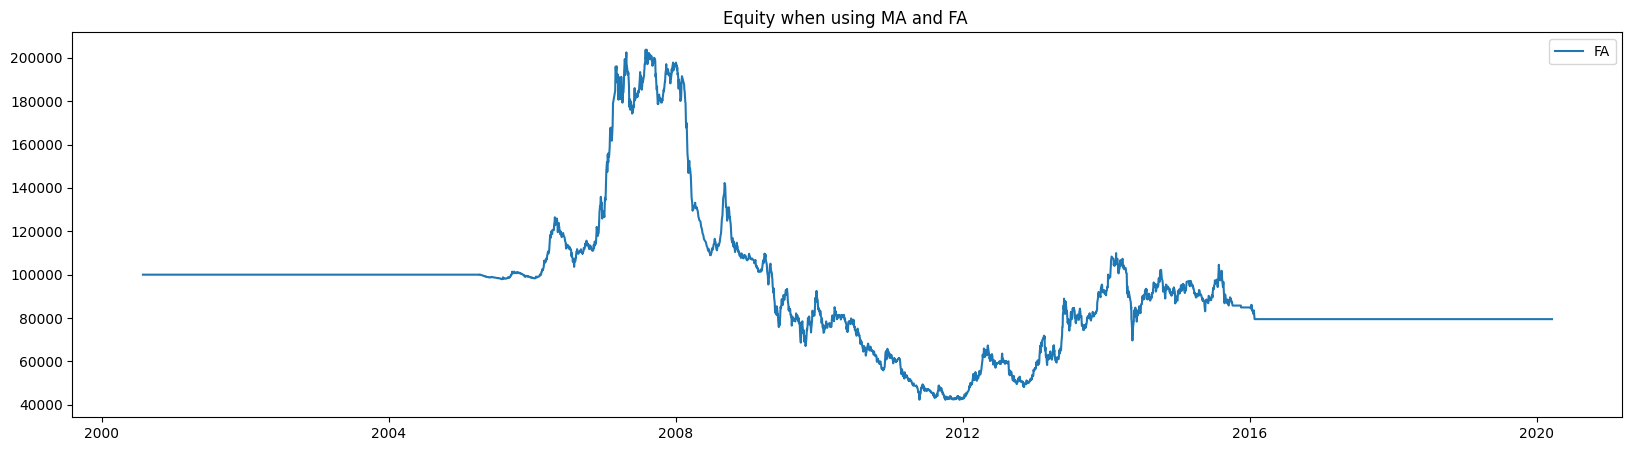

In [21]:
# Plot to compare Equity by FA strategy
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(stats_FA._values[-2]['Equity'], label = 'FA')
#plt.plot(stats_SMA._values[-2]['Equity'], label = 'MA')
plt.title("Equity when using MA and FA ")
plt.legend()
plt.show()


# Kết hợp TA và FA stratery

In [22]:
# Tạo copy dữ liệu từ TA stratergy và FA stratergy
data1 = ta_df.copy()
data2 = final_fa_data.copy()
# Đổi lại tên cột position giữa 2 bảng tránh nhầm lẫn
data1.rename(columns={'position':'ta_position'}, inplace = True)
data2.rename(columns={'position':'fa_position'}, inplace = True)
# Loại các cột không cần thiết
data2 = data2[['RoE','fa_position']]

In [23]:
data1.head()

,Open,High,Low,Close,Volume,MA20,MA50,ta_position
Date,,,,,,,,
2000-07-28,16.0,16.0,16.0,1.41,1000,NaN,NaN,None
2000-07-31,16.3,16.3,16.3,1.44,300,NaN,NaN,None
2000-08-02,16.6,16.6,16.6,1.47,100,NaN,NaN,None
2000-08-04,16.9,16.9,16.9,1.49,200,NaN,NaN,None
2000-08-07,17.2,17.2,17.2,1.52,2800,NaN,NaN,None


In [24]:
data2.head()

,RoE,fa_position
Date,,
2000-07-28,NaN,NaN
2000-07-31,NaN,NaN
2000-08-02,NaN,NaN
2000-08-04,NaN,NaN
2000-08-07,NaN,NaN


In [25]:
# Tổng hợp dữ liệu thành dữ liệu master
combined_data = data1.merge(data2, left_index= True, right_index = True)
combined_data

,Open,High,Low,Close,Volume,MA20,MA50,ta_position,RoE,fa_position
Date,,,,,,,,,,
2000-07-28,16.00,16.0,16.00,1.41,1000,NaN,NaN,None,NaN,NaN
2000-07-31,16.30,16.3,16.30,1.44,300,NaN,NaN,None,NaN,NaN
2000-08-02,16.60,16.6,16.60,1.47,100,NaN,NaN,None,NaN,NaN
2000-08-04,16.90,16.9,16.90,1.49,200,NaN,NaN,None,NaN,NaN
2000-08-07,17.20,17.2,17.20,1.52,2800,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-12,28.60,29.0,27.85,28.00,1147630,32.1670,33.1530,None,NaN,NaN
2020-03-13,26.25,28.7,26.25,28.20,1340020,31.9020,33.0402,None,NaN,NaN
2020-03-16,27.70,28.5,27.70,28.05,892480,31.6365,32.9168,None,NaN,NaN


Khi kết hợp TA và FA strategy, ta sẽ tìm những giao dịch mà tại đó đều có singal từ SMA và chỉ số RoE:


*   Sigal từ MA: MA20 cắt lên M50 -> buy
*   Sigal từ MA: MA20 cắt xuống M50 -> sell
*   Chỉ số RoE: RoE > ngưỡng mua -> buy
*   Chỉ số RoE: RoE < ngưỡng bán -> sell


In [26]:
# Query để tìm ra những giao dịch có cùng lệnh
combined_data.query('ta_position == fa_position')

,Open,High,Low,Close,Volume,MA20,MA50,ta_position,RoE,fa_position
Date,,,,,,,,,,
2005-06-20,2.37,2.37,2.37,2.37,41790,2.3400,2.3388,buy,27.611100,buy
2006-01-23,3.29,3.29,3.25,3.25,34800,3.1540,3.1480,buy,24.908359,buy
2006-08-29,7.67,7.72,7.67,7.71,27270,7.2345,7.2004,buy,46.755063,buy
2007-04-20,23.06,22.96,22.47,22.47,504260,24.9210,25.1404,sell,9.092345,sell
2007-06-22,22.97,22.97,22.97,22.96,123370,23.9260,24.0138,sell,9.092345,sell
2008-07-28,4.48,4.71,4.48,4.47,347190,4.7835,4.7352,buy,16.451390,buy
2009-03-30,5.22,5.36,5.07,5.19,1337630,4.1605,4.1060,buy,15.688672,buy
2010-01-29,8.70,9.00,8.68,8.85,326810,9.2100,9.1856,buy,16.807741,buy
2010-02-23,9.56,9.56,9.23,9.24,638510,9.0345,9.0196,buy,16.807741,buy


Có tất cả 15 giao dịch tại đó các chỉ số MA20, MA50, RoE đều thoả mãn điều kiện đã cho

In [27]:
# Xét trường TA stratergy ra tính hiệu bán, FA ra tính hiệu mua
combined_data.query('ta_position == "sell" & fa_position == "buy"')

,Open,High,Low,Close,Volume,MA20,MA50,ta_position,RoE,fa_position
Date,,,,,,,,,,
2005-05-26,2.29,2.30,2.29,2.30,20840,2.3080,2.3140,sell,27.611100,buy
2005-11-25,3.16,3.16,3.14,3.14,73580,3.1900,3.2000,sell,30.337736,buy
2006-06-12,8.23,8.23,8.23,8.23,51000,8.3910,8.4276,sell,31.058443,buy
2010-02-03,9.09,9.18,9.01,9.14,506410,9.0710,9.0892,sell,16.807741,buy
2011-02-15,8.19,8.24,7.99,8.04,1063730,7.8905,7.8908,sell,21.748647,buy
2011-08-02,5.62,5.67,5.62,5.62,542290,5.7750,5.7850,sell,16.502182,buy
2012-09-04,8.98,9.09,8.98,9.03,252860,9.3175,9.3360,sell,17.006222,buy
2018-02-12,32.48,33.44,32.48,33.44,1053670,35.4530,35.6040,sell,19.183554,buy
2019-01-04,27.06,27.33,26.65,26.97,179540,28.6945,28.7394,sell,16.470762,buy


Các giao dịch khi FA có tín hiệu mua vào nhưng đa số các giao dịch có chỉ số RoE khá cao và chỉ số này giảm dần qua các năm cộng thêm 2 chỉ số MA20 và MA50 (chỉ số ngắn hạn) không đạt yêu cầu. Vậy các trường hợp này không được tính là buy hoặc sell trong final position

In [28]:
# Tạo final position (quyết định cuối cùng khi kết hợp FA và TA)
combined_data.loc[(combined_data['ta_position'] == combined_data['fa_position'])
                 & (combined_data['ta_position'] == 'buy') ,'position'] = 'buy'

combined_data.loc[(combined_data['ta_position'] == combined_data['fa_position'])
                 & (combined_data['ta_position'] == 'sell') ,'position'] = 'sell'

# Loại các cột không cần thiết
combined_data.drop(['ta_position','fa_position'], axis = 1, inplace = True)

# Hiển thị dữ liệu
combined_data

,Open,High,Low,Close,Volume,MA20,MA50,RoE,position
Date,,,,,,,,,
2000-07-28,16.00,16.0,16.00,1.41,1000,NaN,NaN,NaN,NaN
2000-07-31,16.30,16.3,16.30,1.44,300,NaN,NaN,NaN,NaN
2000-08-02,16.60,16.6,16.60,1.47,100,NaN,NaN,NaN,NaN
2000-08-04,16.90,16.9,16.90,1.49,200,NaN,NaN,NaN,NaN
2000-08-07,17.20,17.2,17.20,1.52,2800,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-03-12,28.60,29.0,27.85,28.00,1147630,32.1670,33.1530,NaN,NaN
2020-03-13,26.25,28.7,26.25,28.20,1340020,31.9020,33.0402,NaN,NaN
2020-03-16,27.70,28.5,27.70,28.05,892480,31.6365,32.9168,NaN,NaN


In [29]:
# Định nghĩa class strategy khi kết hợp TA và FA
# Khi kết hợp tín hiệu lẫn mau và bán từ FA và TA
# ta có khoảng tin cậy lớn hơn để mua hoặc bán
# từ đó số lượng khi mua sẽ cao hơn thi thực riêng lẻ từng strategy
class StrategyCombine(Strategy):
    def init(self):
        pass

    # Override next() method in Strategy bass class
    # Define our stratergy
    def next(self):
        if self.data.position == 'buy':
            self.buy(size = 7000)           # Số lượng mua là 7000
        elif self.data.position == 'sell':
            #self.position.close()
            self.sell(size = 7000)          # Số lượng bán là 7000

In [30]:
# Backtest for combine TA and FA
tafa_bt = Backtest(combined_data, StrategyCombine, cash=100000, commission=0.002, trade_on_close=True, exclusive_orders=True)
tafa_bt = tafa_bt.run()
tafa_bt.to_frame()

,0
Start,2000-07-28 00:00:00
End,2020-03-18 00:00:00
Duration,7173 days 00:00:00
Exposure Time [%],77.559637
Equity Final [$],360381.66
Equity Peak [$],485400.68
Return [%],260.38166
Buy & Hold Return [%],2048.93617
Return (Ann.) [%],7.057917
Volatility (Ann.) [%],11.719277


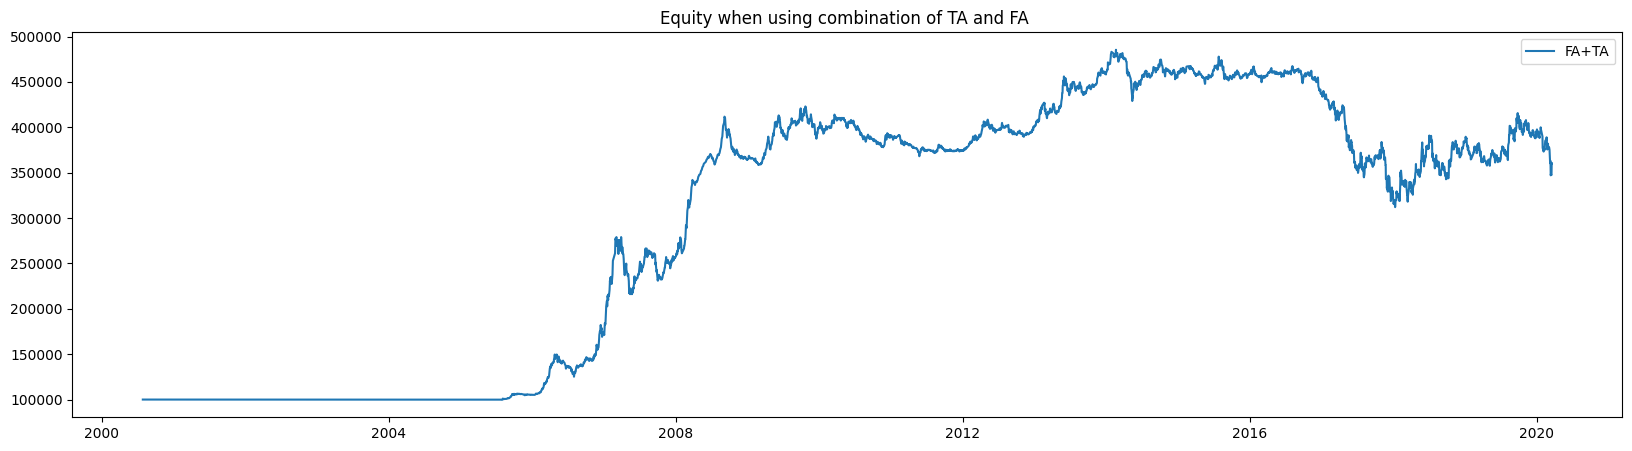

In [31]:
# Plot to Equity by TA+FA strategy
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(tafa_bt._values[-2]['Equity'], label = 'FA+TA')
#plt.plot(stats_SMA._values[-2]['Equity'], label = 'SMA')
plt.title("Equity when using combination of TA and FA ")
plt.legend()
plt.show()

# So sánh kết quả giữa các strategy

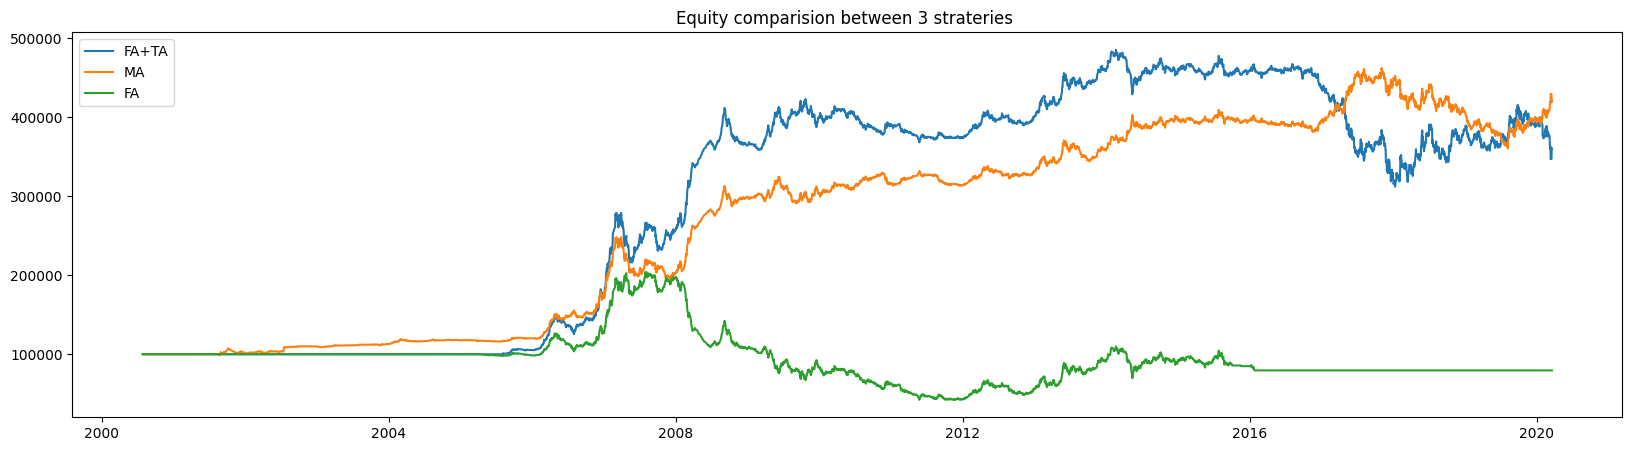

In [32]:
# So sánh về Equity
# Plot to Equity by TA+FA strategy
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(tafa_bt._values[-2]['Equity'], label = 'FA+TA')
plt.plot(stats_MA._values[-2]['Equity'], label = 'MA')
plt.plot(stats_FA._values[-2]['Equity'], label = 'FA')
plt.title("Equity comparision between 3 strateries ")
plt.legend()
plt.show()

Nhận xét:
*   Khi kết hợp tín hiệu từ cả TA và FA, vốn chủ sở hửu được cải thiện rõ rệt trong khoảng từ 2008 đến 2016
*   Giai đoạn 2008 - 2009, thị trường có dấu hiệu đi xuống mạnh, khi mỗi xử dụng tính hiệu từ FA, sẽ có đánh giá thực tế của cổ phiếu. Điều này được khắc phụ khi kết hợp thêm tín hiệu từ TA.
*   Giai đoạn 2018 - 2020, không có dữ liệu về doanh thu, vốn chủ sở hữu cho FA nên dữ liệu giai đoạn này không phản ánh đúng hiệu năng của các chiến lược

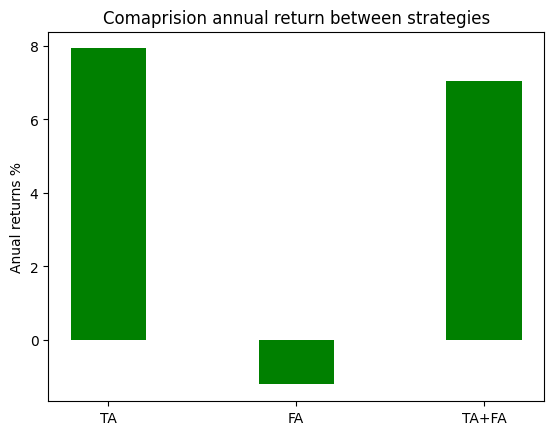

In [33]:
# So sánh về tăng tưởng lợi nhuận
win_rate = {'TA': stats_MA.to_frame().at['Return (Ann.) [%]',0],
            'FA': stats_FA.to_frame().at['Return (Ann.) [%]',0],
            'TA+FA': tafa_bt.to_frame().at['Return (Ann.) [%]',0],}
# Vẽ bar chart
plt.bar(list(win_rate.keys()), list(win_rate.values()), color ='green',width = 0.4)
plt.ylabel("Anual returns %")
plt.title("Comaprision annual return between strategies")
plt.show()

Nhận xét:
*   Khi kết hợp tín hiệu từ cả TA và FA, tỷ lệ tăng trưởng hàng năm có giảm nhẹ hơn so với khi chỉ sử dụng chiến lược TA nhưng không đáng kể
*   Khi sử dụng chiến lược FA, các chỉ số được tính toán theo quý không phản ánh rõ thực trạng thị trường trong khời gian ngắn hạn dẫn đến lỗ nhiều


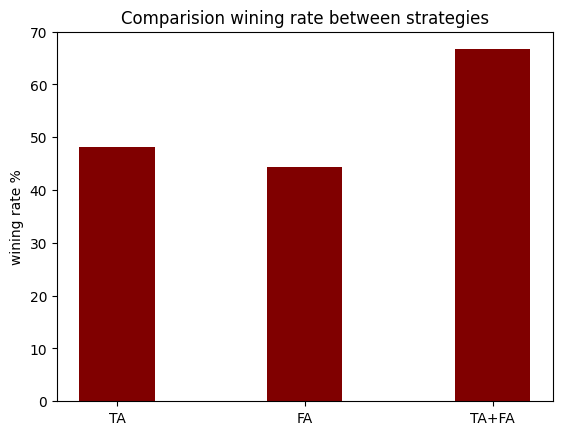

In [34]:
# So sánh về wining rate
win_rate = {'TA': stats_MA.to_frame().at['Win Rate [%]',0],
            'FA': stats_FA.to_frame().at['Win Rate [%]',0],
            'TA+FA': tafa_bt.to_frame().at['Win Rate [%]',0],}
# Vẽ bar chart
plt.bar(list(win_rate.keys()), list(win_rate.values()), color ='maroon',width = 0.4)
plt.ylabel("wining rate %")
plt.title("Comparision wining rate between strategies")
plt.show()

Nhận xét:
*   Khi kết hợp tín hiệu từ cả TA và FA, win rate cao nhất so với 2 chiến lược kia, nguyên nhân là các quyết định mua và bán có độ tin cậy hơn dẫn đến khả năng lỗ trong từng giao dịch ít hơn